# Lab 2 - Task 1: Regularization Comparison

Compare L1, L2, ElasticNet regularization on Linear and Logistic Regression models.


In [1]:
import sys
sys.path.append('..')

import torch
import matplotlib.pyplot as plt
from src.data.preprocessing import preprocess_houses_data, preprocess_titanic_data
from src.models.linear_regression import LinearRegression
from src.models.logistic_regression import LogisticRegression
from src.utils.visualization import plot_regularization_comparison

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")


Device: cuda


## 1. Linear Regression - California Houses


In [2]:
# Load data
X_train, X_test, y_train, y_test, _ = preprocess_houses_data('../data/California_Houses.csv', device=device)

# Split for validation
n_train = int(0.8 * len(X_train))
X_train_split = X_train[:n_train]
X_val_split = X_train[n_train:]
y_train_split = y_train[:n_train]
y_val_split = y_train[n_train:]


In [3]:
# Train models with different regularization
regularization_params = {
    'none': {'reg_type': 'none', 'l1_lambda': 0.0, 'l2_lambda': 0.0, 'alpha': 0.0},
    'l1': {'reg_type': 'l1', 'l1_lambda': 1, 'l2_lambda': 0.0, 'alpha': 0.0},
    'l2': {'reg_type': 'l2', 'l1_lambda': 0.0, 'l2_lambda': 1, 'alpha': 0.0},
    'elasticnet': {'reg_type': 'elasticnet', 'l1_lambda': 1, 'l2_lambda': 1, 'alpha': 0.5}
}

linear_histories = {}

for reg_name, params in regularization_params.items():
    print(f"Training Linear Regression with {reg_name.upper()} regularization...")
    
    model = LinearRegression(learning_rate=0.01, max_epochs=300, device=device, **params)
    model.fit(X_train_split, y_train_split, X_val_split, y_val_split)
    linear_histories[reg_name] = model.history
    
    test_metrics = model.score(X_test, y_test)
    print(f"Test R²: {test_metrics['r2']:.4f}, Test RMSE: {test_metrics['rmse']:.2f}")


Training Linear Regression with NONE regularization...
Test R²: 0.6552, Test RMSE: 67972.30
Training Linear Regression with L1 regularization...
Test R²: 0.6552, Test RMSE: 67972.52
Training Linear Regression with L2 regularization...
Test R²: 0.5518, Test RMSE: 77496.91
Training Linear Regression with ELASTICNET regularization...
Test R²: 0.5980, Test RMSE: 73397.80


Plotting regression regularization comparison...
Debug - History keys: ['none', 'l1', 'l2', 'elasticnet']
none: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 300
  val_metrics keys: ['n', 'sum_abs', 'sum_sq', 'mse', 'mae', 'rmse', 'r2', 'mape']
l1: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 300
  val_metrics keys: ['n', 'sum_abs', 'sum_sq', 'mse', 'mae', 'rmse', 'r2', 'mape']
l2: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 300
  val_metrics keys: ['n', 'sum_abs', 'sum_sq', 'mse', 'mae', 'rmse', 'r2', 'mape']
elasticnet: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 300
  val_metrics keys: ['n', 'sum_abs', 'sum_sq', 'mse', 'mae', 'rmse', 'r2', 'mape']


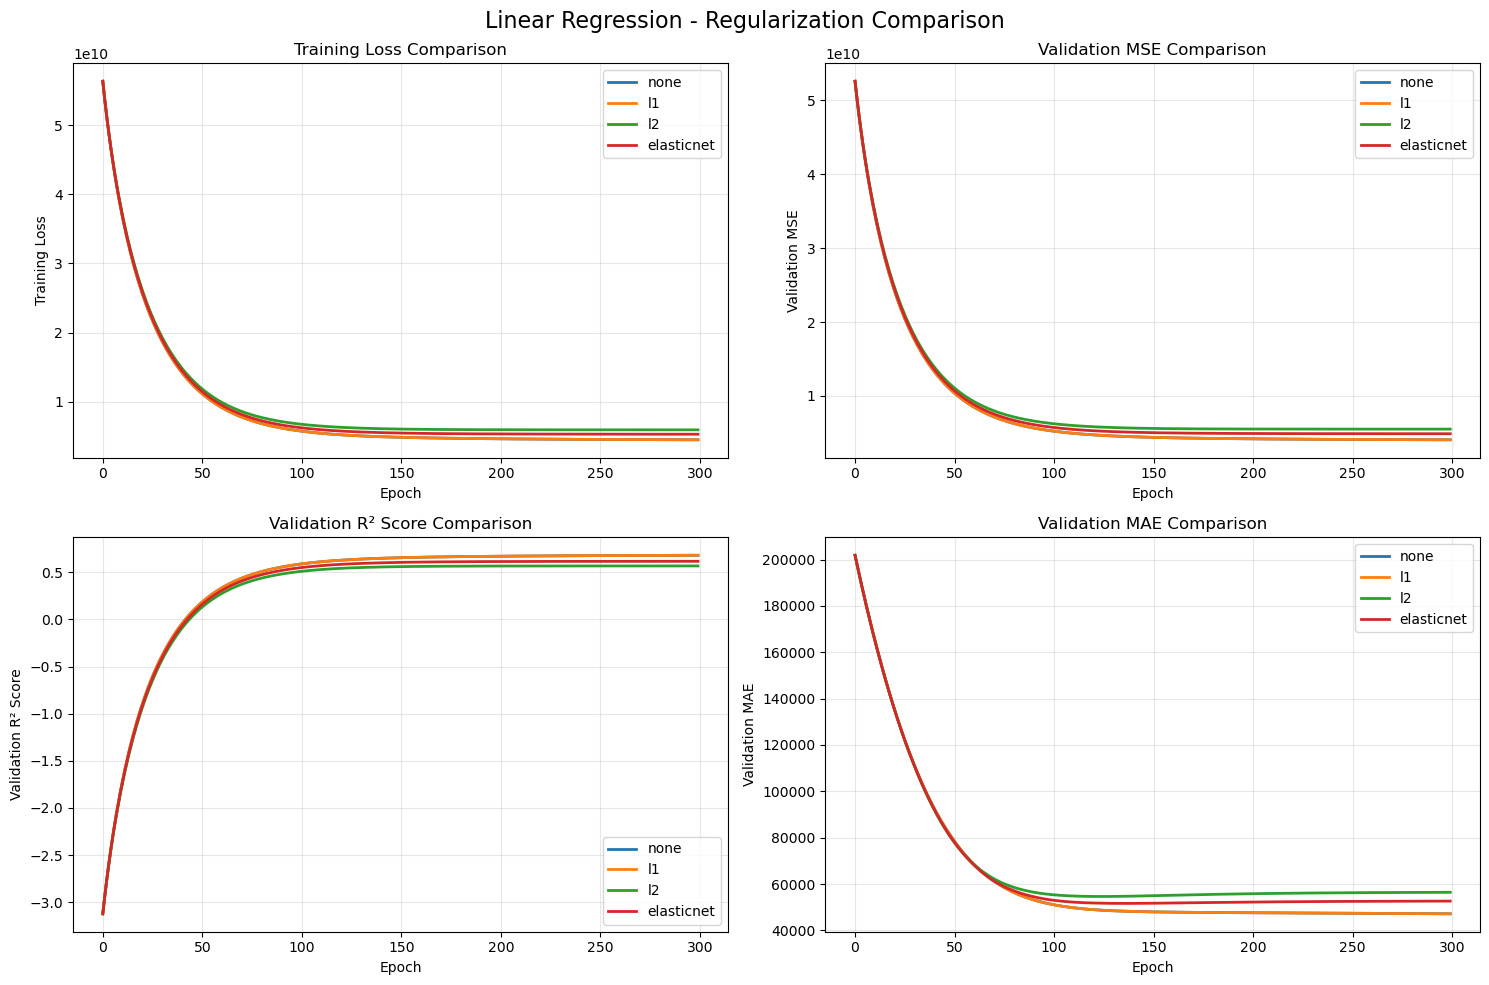

In [4]:
# Plot regularization comparison for Linear Regression
plot_regularization_comparison(
    linear_histories, 
    title="Linear Regression - Regularization Comparison",
    model_type="regression"
)


## 2. Logistic Regression - Titanic


In [5]:
# Load Titanic data
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic, _ = preprocess_titanic_data('../data/Titanic-Dataset.csv', device=device)

# Split for validation
n_train_titanic = int(0.8 * len(X_train_titanic))
X_train_titanic_split = X_train_titanic[:n_train_titanic]
X_val_titanic_split = X_train_titanic[n_train_titanic:]
y_train_titanic_split = y_train_titanic[:n_train_titanic]
y_val_titanic_split = y_train_titanic[n_train_titanic:]


In [6]:
# Train Logistic Regression models with different regularization
logistic_histories = {}

for reg_name, params in regularization_params.items():
    print(f"Training Logistic Regression with {reg_name.upper()} regularization...")
    
    # Lower LR and increase epochs to ensure stable convergence on Titanic
    model = LogisticRegression(learning_rate=0.001, max_epochs=200, device=device, **params)
    model.fit(X_train_titanic_split, y_train_titanic_split, X_val_titanic_split, y_val_titanic_split)
    logistic_histories[reg_name] = model.history
    
    test_metrics = model.score(X_test_titanic, y_test_titanic)
    print(f"Test Accuracy: {test_metrics['accuracy']:.4f}, Test F1: {test_metrics['f1_score']:.4f}")


Training Logistic Regression with NONE regularization...
Test Accuracy: 0.7978, Test F1: 0.7313
Training Logistic Regression with L1 regularization...
Test Accuracy: 0.8034, Test F1: 0.6667
Training Logistic Regression with L2 regularization...
Test Accuracy: 0.8258, Test F1: 0.7597
Training Logistic Regression with ELASTICNET regularization...
Test Accuracy: 0.8090, Test F1: 0.6852


Plotting classification regularization comparison...
Debug - History keys: ['none', 'l1', 'l2', 'elasticnet']
none: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 200
  val_metrics keys: ['tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'f1_score', 'log_loss']
l1: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 200
  val_metrics keys: ['tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'f1_score', 'log_loss']
l2: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 200
  val_metrics keys: ['tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'f1_score', 'log_loss']
elasticnet: ['train_loss', 'train_metrics', 'val_metrics']
  train_loss length: 200
  val_metrics keys: ['tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'f1_score', 'log_loss']


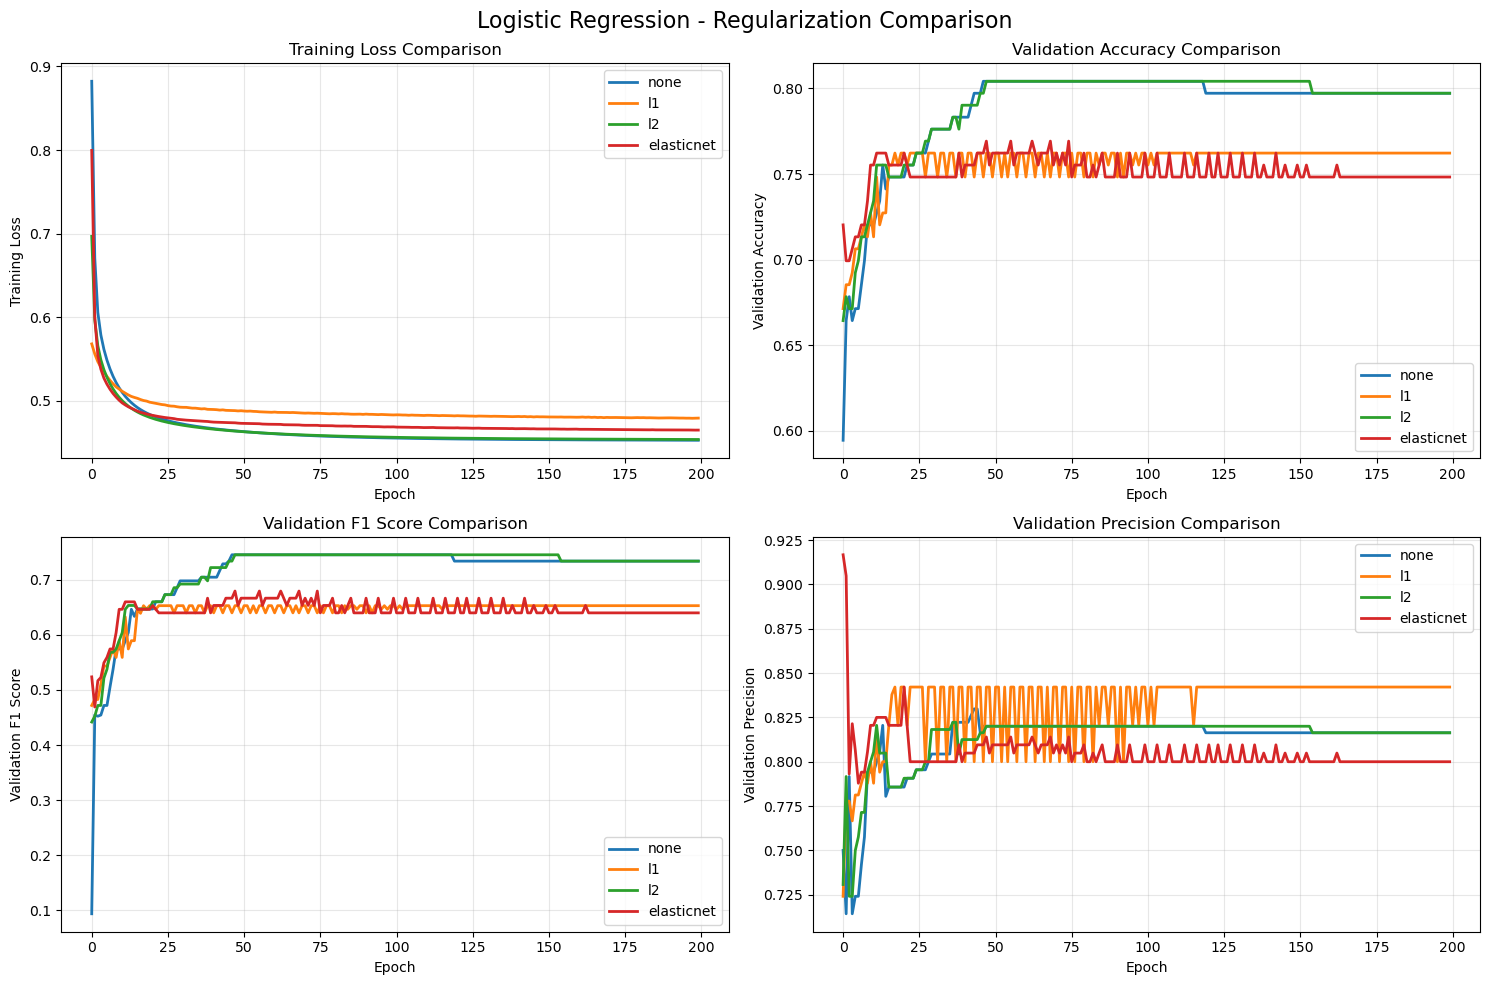

In [7]:
# Plot regularization comparison for Logistic Regression
plot_regularization_comparison(
    logistic_histories, 
    title="Logistic Regression - Regularization Comparison",
    model_type="classification"
)



## 3. Results Summary


In [8]:
print("=== REGULARIZATION COMPARISON RESULTS ===")
print("\nLinear Regression (California Houses):")
print("- Shows how L1, L2, and ElasticNet affect regression performance")
print("- Compare loss curves and R² scores across different regularization types")

print("\nLogistic Regression (Titanic):")
print("- Shows how L1, L2, and ElasticNet affect classification performance") 
print("- Compare loss curves and accuracy/F1 scores across different regularization types")

print("\nKey Observations:")
print("- L1 regularization creates sparse models (feature selection)")
print("- L2 regularization prevents overfitting by shrinking weights")
print("- ElasticNet combines benefits of both L1 and L2")
print("- Different regularization types show different convergence patterns")


=== REGULARIZATION COMPARISON RESULTS ===

Linear Regression (California Houses):
- Shows how L1, L2, and ElasticNet affect regression performance
- Compare loss curves and R² scores across different regularization types

Logistic Regression (Titanic):
- Shows how L1, L2, and ElasticNet affect classification performance
- Compare loss curves and accuracy/F1 scores across different regularization types

Key Observations:
- L1 regularization creates sparse models (feature selection)
- L2 regularization prevents overfitting by shrinking weights
- ElasticNet combines benefits of both L1 and L2
- Different regularization types show different convergence patterns
